In [14]:
# Make sure that you have all these libaries available to run the code successfully
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.read_csv(r"C:\Users\tomlm\Downloads\population2.csv")
X = df.iloc[:, 2:3].values
y = df.iloc[:, 3:].values

print(X)
print(y)

[[1900]
 [1901]
 [1902]
 [1903]
 [1904]
 [1905]
 [1906]
 [1907]
 [1908]
 [1909]
 [1910]
 [1911]
 [1912]
 [1913]
 [1914]
 [1915]
 [1916]
 [1917]
 [1918]
 [1919]
 [1920]
 [1921]
 [1922]
 [1923]
 [1924]
 [1925]
 [1926]
 [1927]
 [1928]
 [1929]
 [1930]
 [1931]
 [1932]
 [1933]
 [1934]
 [1935]
 [1936]
 [1937]
 [1938]
 [1939]
 [1940]
 [1941]
 [1942]
 [1943]
 [1944]
 [1945]
 [1946]
 [1947]
 [1948]
 [1949]
 [1950]
 [1951]
 [1952]
 [1953]
 [1954]
 [1955]
 [1956]
 [1957]
 [1958]
 [1959]
 [1960]
 [1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]]
[[1647405022]
 [1658785

<AxesSubplot:xlabel='Year'>

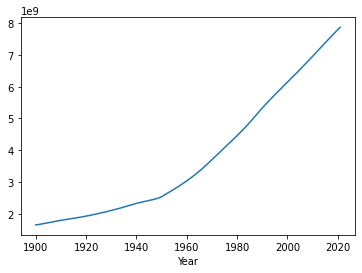

In [16]:
df.index = df.Year
population = df['WorldPop']
population.plot()

In [19]:

# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv(r"C:\Users\tomlm\Downloads\population2.csv", usecols=[3], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.68)
train_size = 1
#test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]###########
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)


IndexError: tuple index out of range

In [64]:
print(testPredictPlot)

[[         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [         nan]
 [      

In [52]:
plt.savefig("C:/Users/tomlm/OneDrive/Desktop/LSTM.png", dpi=1200)

<Figure size 432x288 with 0 Axes>

Epoch 1/100
113/113 - 1s - loss: 0.1369 - 1s/epoch - 13ms/step
Epoch 2/100
113/113 - 0s - loss: 0.0776 - 139ms/epoch - 1ms/step
Epoch 3/100
113/113 - 0s - loss: 0.0446 - 151ms/epoch - 1ms/step
Epoch 4/100
113/113 - 0s - loss: 0.0288 - 142ms/epoch - 1ms/step
Epoch 5/100
113/113 - 0s - loss: 0.0189 - 134ms/epoch - 1ms/step
Epoch 6/100
113/113 - 0s - loss: 0.0114 - 159ms/epoch - 1ms/step
Epoch 7/100
113/113 - 0s - loss: 0.0061 - 140ms/epoch - 1ms/step
Epoch 8/100
113/113 - 0s - loss: 0.0029 - 143ms/epoch - 1ms/step
Epoch 9/100
113/113 - 0s - loss: 0.0013 - 144ms/epoch - 1ms/step
Epoch 10/100
113/113 - 0s - loss: 5.5335e-04 - 142ms/epoch - 1ms/step
Epoch 11/100
113/113 - 0s - loss: 2.8512e-04 - 141ms/epoch - 1ms/step
Epoch 12/100
113/113 - 0s - loss: 2.0424e-04 - 144ms/epoch - 1ms/step
Epoch 13/100
113/113 - 0s - loss: 1.8076e-04 - 146ms/epoch - 1ms/step
Epoch 14/100
113/113 - 0s - loss: 1.6961e-04 - 143ms/epoch - 1ms/step
Epoch 15/100
113/113 - 0s - loss: 1.7297e-04 - 148ms/epoch - 1ms/st

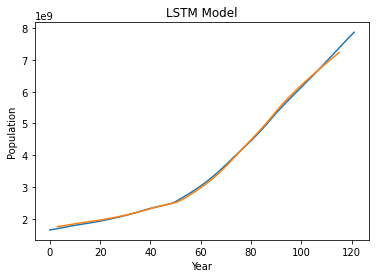

In [25]:

# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv(r"C:\Users\tomlm\Downloads\population2.csv", usecols=[3], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.96)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("LSTM Model")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()